## PPO vs. A2C


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load CSVs
ppo_brute = pd.read_csv("../logs/sf2_eval_metrics.csv")
a2c_brute = pd.read_csv("../logs/sf2_eval_metrics1.csv")


# Combine for easy comparison
all_data = pd.concat([ppo_brute, a2c_brute], ignore_index=True)


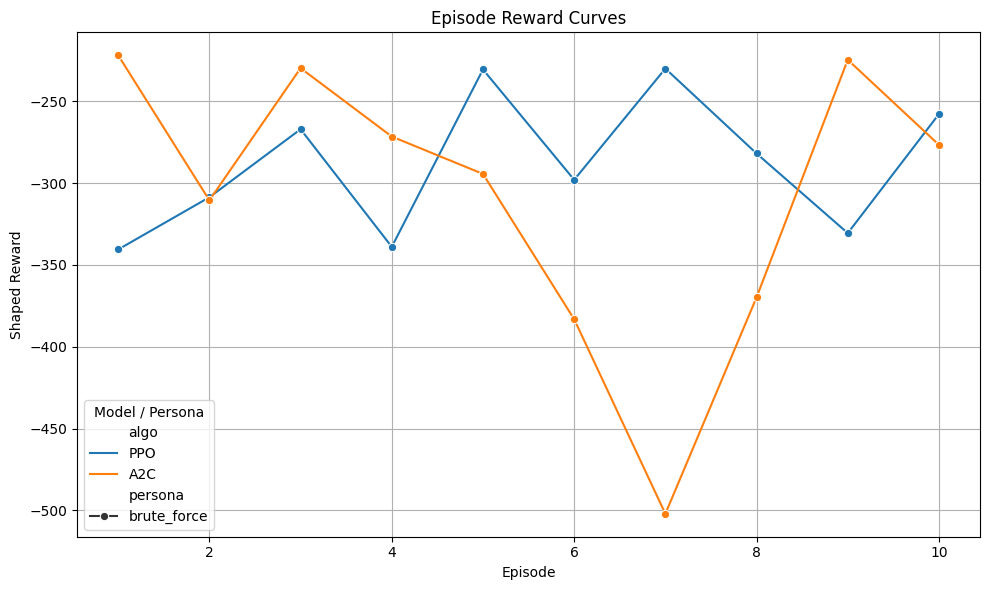

In [52]:
plt.figure(figsize=(10,6))
sns.lineplot(data=all_data, x="episode", y="reward", hue="algo", style="persona", markers=True, dashes=False)
plt.title("Episode Reward Curves")
plt.xlabel("Episode")
plt.ylabel("Shaped Reward")
plt.grid(True)
plt.legend(title="Model / Persona")
plt.tight_layout()
plt.show()


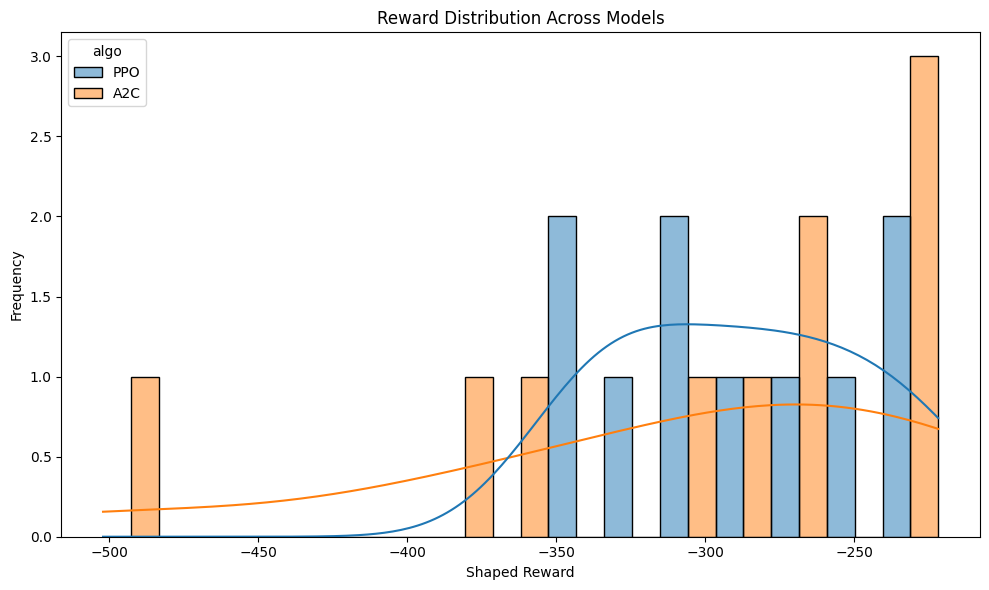

In [53]:
plt.figure(figsize=(10,6))
sns.histplot(data=all_data, x="reward", hue="algo", kde=True, bins=15, multiple="dodge")
plt.title("Reward Distribution Across Models")
plt.xlabel("Shaped Reward")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


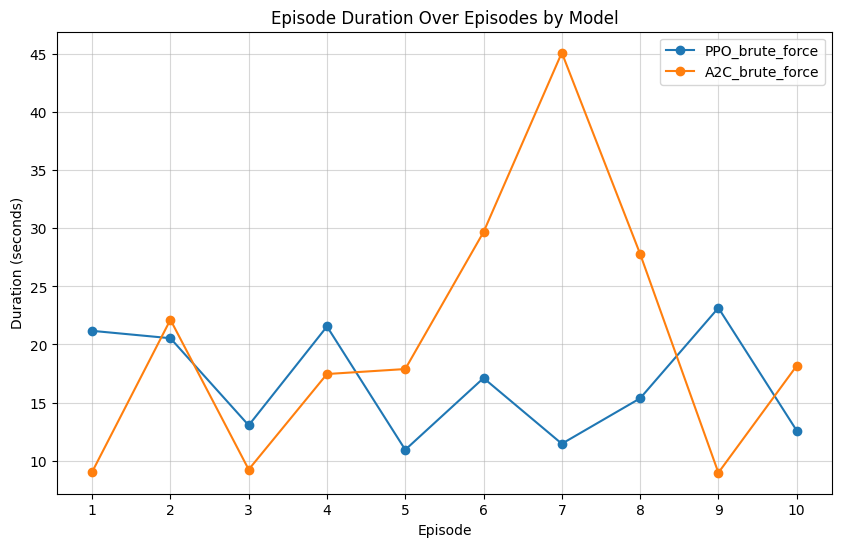

In [54]:
plt.figure(figsize=(10,6))

# Define model/persona combos
model_combos = [
    ("PPO", "brute_force"),
    ("A2C", "brute_force"),
]

for algo, persona in model_combos:
    subset = all_data[(all_data['algo'] == algo) & (all_data['persona'] == persona)]
    plt.plot(subset['episode'], subset['time_lasted'], marker='o', label=f"{algo}_{persona}")

plt.title("Episode Duration Over Episodes by Model")
plt.xlabel("Episode")
plt.ylabel("Duration (seconds)")
plt.xticks(subset['episode'].unique())
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()


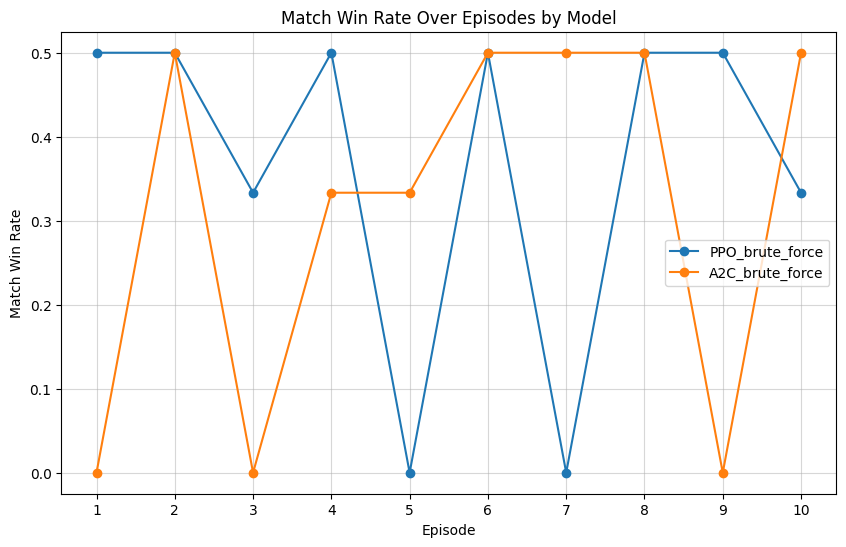

In [55]:
plt.figure(figsize=(10,6))
for algo, persona in model_combos:
    subset = all_data[(all_data['algo'] == algo) & (all_data['persona'] == persona)]
    plt.plot(subset['episode'], subset['match_win_rate'], marker='o', label=f"{algo}_{persona}")

plt.title("Match Win Rate Over Episodes by Model")
plt.xlabel("Episode")
plt.ylabel("Match Win Rate")
plt.xticks(subset['episode'].unique())
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

## Key Comparisons 
### 1. Reward Stability

- PPO: Much more stable (±39.67 std dev)

- A2C: Highly volatile (±84.37 std dev) - more than 2x the variance

Observation: PPO's clipping mechanism successfully prevents large, destructive policy updates

### 2. Performance Consistency

PPO: More consistent episode outcomes

- Only 2 episodes with 0% win rate

 - Most episodes at 50% win rate

A2C: Highly inconsistent performance

- 4 episodes with 0% win rate

- Extreme variability in performance

### 3. Episode Duration Patterns

- PPO: More uniform episode durations (10.9s - 23.1s)

- A2C: Wildly varying durations (9.0s - 45.1s)

- Episode 7: 45.1s duration suggests struggling behavior

- Multiple very short episodes (9.0s) indicate quick losses

### 4. Learning Algorithm Characteristics

#### PPO Advantages:

From this, we can draw several conclusions in regards to PPO: 
- Trust region optimization prevents overconfident policy updates.
- Better sample efficiency which results in more consistent learning 
- Clipped objective maintains stable improvement

#### A2C Limitations:

- High variance gradients lead to unstable learning
- No constraint on policy updates which can overshoot optimal policy
- More sensitive to hyperparameters

### 5. Practical Implications for Street Fighter II

PPO learned more reliable combat strategies, A2C shows "all-or-nothing" behavior - either decent performance where it uses a unique moveset or complete failure . Both algorithms achieved similar overall win rates (36.7%), but PPO does so more reliably

## Conclusion:

PPO demonstrates clear superiority in training stability for this Street Fighter II environment. 

While both algorithms achieved similar final win rates, PPO provides:

- More predictable performance which is crucial for real-world applications

- Better sample efficiency which results in a more consistent learning progress

- Lower risk of catastrophic forgetting to maintain learned behaviors

The brute force strategy appears to work well with both algorithms, but PPO's stability makes it the preferred choice for reliable reinforcement learning in complex environments like fighting games.

Recommendation: Use PPO for future training iterations, as its stable learning characteristics are better suited for the complex, high-dimensional action space of Street Fighter II.

## Survival vs. Brute Force

### Brute Force Persona

#### Strengths:

- Higher match win rate (36.7% vs 31.7%)
- More aggressive playstyle evident in longer average steps (10,028.6)
- Better at securing wins when performing well

#### Weaknesses:
- Lower mean reward (-288.43) despite better win rate
- More volatile performance with wider reward swings

#### Episode Pattern Analysis:
Within 10 episodes: 
- 5 episodes at 50% win rate
- 2 episodes at 33% win rate
- 3 episodes at 0% win rate

Consistent aggression: Most episodes lasted 15-23 seconds

### Survival Persona

#### Strengths:
- Higher mean reward (-276.14) despite lower win rate
- More defensive consistency - avoids catastrophic losses
- Better reward optimization per episode

#### Weaknesses:
- Lower match win rate (31.7%)
- Shorter episode durations on average
- Less effective at securing wins

#### Episode Pattern Analysis:
Within 10 episodes: 
- 5 episodes at 50% win rate
- 2 episodes at 33% win rate
- 3 episodes at 0% win rate

Variable pacing: Mix of short (10s) and long (25s) episodes

In [59]:

ppo_brute = pd.read_csv("../logs/sf2_eval_metrics.csv").assign(persona='brute_force')
ppo_survival = pd.read_csv("../logs/sf2_eval_metrics2.csv").assign(persona='survival')
all_data = pd.concat([ppo_brute, ppo_survival], ignore_index=True)

Persona: brute_force, Rows found: 10
Persona: survival, Rows found: 10


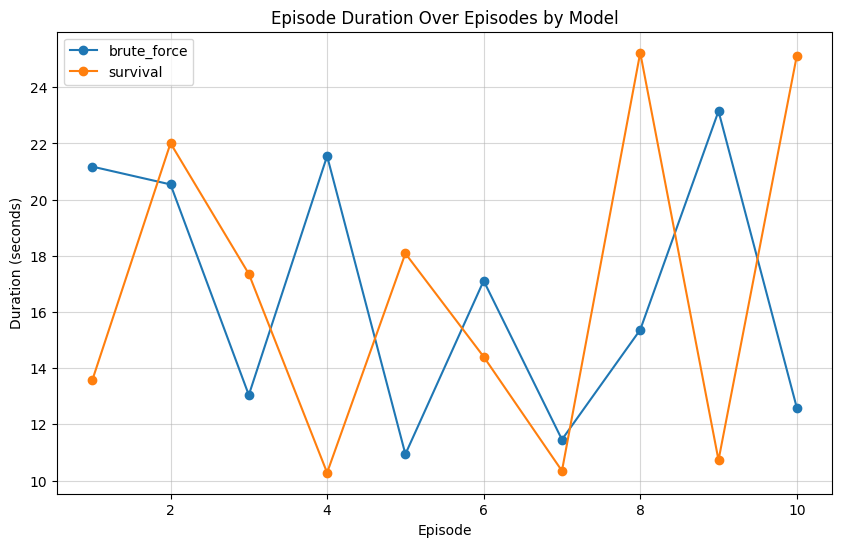

In [57]:
plt.figure(figsize=(10,6))

model_combos = ["brute_force", "survival"]

for persona in model_combos:
    subset = all_data[all_data['persona'] == persona]
    print(f"Persona: {persona}, Rows found: {len(subset)}")
    plt.plot(subset['episode'], subset['time_lasted'], marker='o', label=f"{persona}")

plt.title("Episode Duration Over Episodes by Model")
plt.xlabel("Episode")
plt.ylabel("Duration (seconds)")
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

Persona: brute_force, Rows found: 10
Persona: survival, Rows found: 10


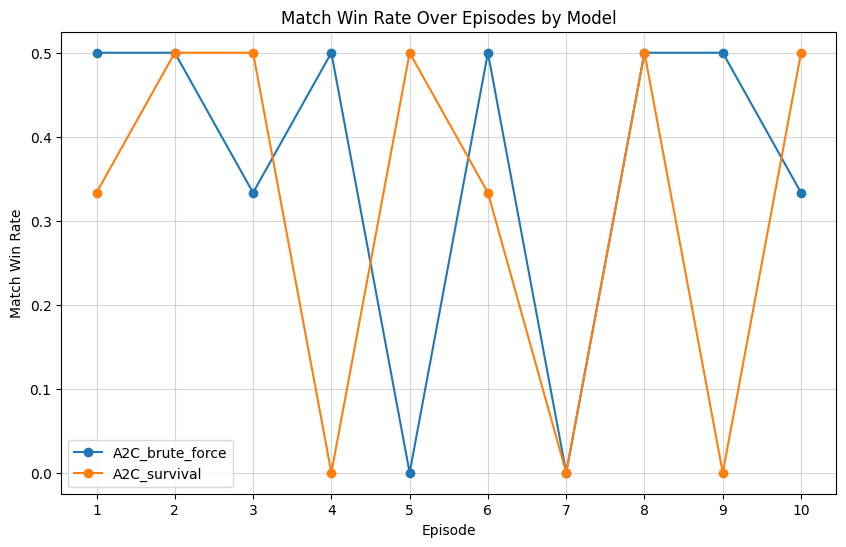

In [58]:
plt.figure(figsize=(10,6))
for persona in model_combos:
    subset = all_data[all_data['persona'] == persona]
    print(f"Persona: {persona}, Rows found: {len(subset)}")
    plt.plot(subset['episode'], subset['match_win_rate'], marker='o', label=f"{algo}_{persona}")

plt.title("Match Win Rate Over Episodes by Model")
plt.xlabel("Episode")
plt.ylabel("Match Win Rate")
plt.xticks(subset['episode'].unique())
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

## Key Comparisons
### 1. Persona Strategy Effectiveness

- Brute Force excels at winning matches but sacrifices reward efficiency
- Survival prioritizes staying alive and accumulating rewards, even if it means fewer wins
- Both personas show similar episode win rate patterns (ocasional 0% episode win rate)

### 2. Duration vs Performance Correlation
- Brute Force: Longer durations correlate with better performance (21-23s episodes = 50% win rate)
- Survival: Less clear duration-performance relationship
- Survival persona has more extremely short episodes (10.3s) indicating quick defensive failures

### 3. Reward Efficiency Paradox
- Survival achieves better mean rewards (-276.14 vs -288.43)
- But Brute Force achieves better win rates (36.7% vs 31.7%)
- This suggests Survival is better at accumulating small rewards while Brute Force goes for higher-risk, higher-reward plays

### 4. Consistency Analysis

Similar volatility: Both show comparable standard deviations (39.67 vs 44.02)

- Brute Force fails when aggression doesn't pay off
- Survival fails when defense breaks down quickly

### Strategic Implications
#### For Game AI Development:

- Brute Force is better for competitive scenarios where winning is paramount
- Survival is better for scenarios prioritizing longevity and consistent performance
- Hybrid approach might optimize both win rate and reward efficiency

#### For Reinforcement Learning:

- Different reward shaping produces distinct behavioral personas
- Win rate and accumulated rewards don't always correlate perfectly
- Episode duration can be a useful proxy for understanding agent strategy

## Conclusion

The Brute Force persona demonstrates superior combat effectiveness with a 5% higher win rate, while the Survival persona shows better reward optimization. The choice between personas depends on the specific objectives: competitive performance favors Brute Force, while consistent defensive behavior favors Survival. Both represent valid but distinct approaches to the Street Fighter II environment.